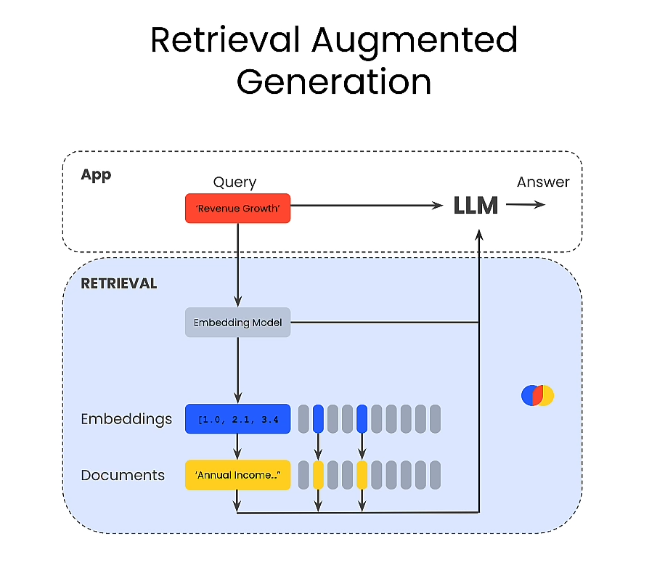

In [3]:
from pypdf import PdfReader
reader = PdfReader('MachineLearning-Lecture01.pdf')
pdf_texts = [
    p.extract_text().strip() for p in reader.pages
]
# Filter the empty strings
pdf_texts = [text for text in pdf_texts if text]
print(pdf_texts[0])

MachineLearning-Lecture01  
Instructor (Andrew Ng): Okay. Good morning. Welcome to CS229, the machine 
learning class. So what I wanna do today is just spend a little time going over the logistics 
of the class, and then we'll start to talk a bit about machine learning.  
By way of introduction, my name's Andrew Ng and I'll be instructor for this class. And so 
I personally work in machine learning, and I've worked on it for about 15 years now, and 
I actually think that machine learning is the most exciting field of all the computer 
sciences. So I'm actually always excited about teaching this class. Sometimes I actually 
think that machine learning is not only the most exciting thing in computer science, but 
the most exciting thing in all of human endeavor, so maybe a little bias there.  
I also want to introduce the TAs, who are all graduate students doing research in or 
related to the machine learning and all aspects of machine learning. Paul Baumstarck 
works in machine learning

In [4]:
from langchain.text_splitter import RecursiveCharacterTextSplitter, SentenceTransformersTokenTextSplitter

In [6]:
character_splitter = RecursiveCharacterTextSplitter(
    separators=["\n\n", "\n", ". ", " ", ""], # Separators for splitting the text
    chunk_size=500,
    chunk_overlap=0
)
character_split_texts = character_splitter.split_text('\n\n'.join(pdf_texts))
print(character_split_texts[0])
print(f"Total Chunk: {len(character_split_texts)}")

MachineLearning-Lecture01  
Instructor (Andrew Ng): Okay. Good morning. Welcome to CS229, the machine 
learning class. So what I wanna do today is just spend a little time going over the logistics 
of the class, and then we'll start to talk a bit about machine learning.  
By way of introduction, my name's Andrew Ng and I'll be instructor for this class. And so 
I personally work in machine learning, and I've worked on it for about 15 years now, and
Total Chunk: 139


In [7]:
token_splitter = SentenceTransformersTokenTextSplitter(chunk_overlap=0, tokens_per_chunk=256)

token_split_texts = []
for text in character_split_texts:
    token_split_texts += token_splitter.split_text(text)

print(token_split_texts[10])
print(f"\nTotal chunks: {len(token_split_texts)}")

2025-03-24 22:43:13.903210: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742834594.082026   18659 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742834594.119081   18659 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1742834594.438414   18659 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1742834594.438494   18659 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1742834594.438500   18659 computation_placer.cc:177] computation placer alr

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

so in this class, we ' ve tried to convey to you a broad set of principles and tools that will be useful for doing many, many things. and every time i teach this class, i can actually very confidently say that after december, no matter what you ' re going to do after this december when you ' ve sort of completed this class, you ' ll find the things you learn in this class very useful, and these things will be useful pretty much no matter what you end up doing later in your life.

Total chunks: 139


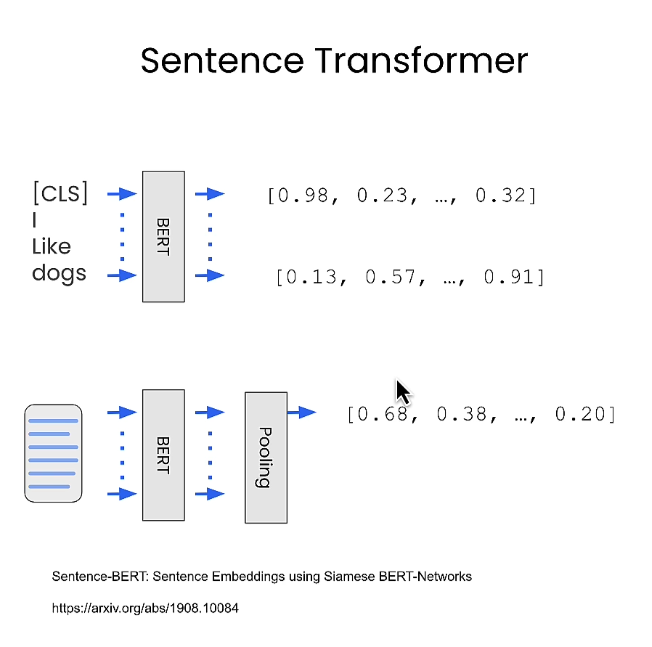

In [8]:
import chromadb
from chromadb.utils.embedding_functions import SentenceTransformerEmbeddingFunction

embedding_function = SentenceTransformerEmbeddingFunction()
print(embedding_function([token_split_texts[10]]))

[array([-4.51972820e-02,  4.47432995e-02,  2.98487991e-02, -2.21471749e-02,
       -7.85511732e-03,  2.68085916e-02,  6.46081194e-02, -5.19820452e-02,
       -1.00776926e-01,  4.98132929e-02, -1.10247564e-02,  6.94159120e-02,
       -4.18973751e-02,  8.45548976e-03,  6.18447736e-03, -2.77059153e-02,
       -5.03749922e-02, -5.01846243e-03, -1.53261656e-02, -3.77647625e-03,
        2.02179123e-02, -4.48564254e-02, -1.22764641e-02,  2.45125294e-02,
       -3.83497328e-02,  9.77234468e-02, -2.98619270e-02, -8.20651501e-02,
        1.14875035e-02, -1.71776190e-02,  9.43065993e-03,  9.19614658e-02,
        1.86671969e-02, -3.61392274e-02, -6.75700009e-02,  5.56522682e-02,
        1.07937731e-01,  5.22719463e-03,  2.94311289e-02,  2.73586554e-03,
       -5.60532287e-02, -4.29332852e-02,  3.87601443e-02, -3.67067978e-02,
        5.98569326e-02, -2.15285607e-02,  1.04184104e-02, -1.08022101e-01,
        5.54465353e-02, -1.65807679e-02, -4.93551046e-03, -6.22707605e-02,
       -1.33692428e-01, 

In [11]:
chroma_client = chromadb.Client()
chroma_collection = chroma_client.create_collection("MachineLearning-Lecture01", embedding_function=embedding_function)

ids = [str(i) for i in range(len(token_split_texts))]

chroma_collection.add(ids=ids, documents=token_split_texts)
chroma_collection.count()

139

In [12]:
query = "What is Machine Learning?"

results = chroma_collection.query(query_texts=[query], n_results=5)
retrieved_documents = results['documents'][0]

for document in retrieved_documents:
    print(document)
    print('\n')

machinelearning - lecture01 instructor ( andrew ng ) : okay. good morning. welcome to cs229, the machine learning class. so what i wanna do today is just spend a little time going over the logistics of the class, and then we ' ll start to talk a bit about machine learning. by way of introduction, my name ' s andrew ng and i ' ll be instructor for this class. and so i personally work in machine learning, and i ' ve worked on it for about 15 years now, and


here ' s a more recent, a more modern, more formal definition of machine learning due to tom mitchell, who says that a well - posed learning problem is defined as follows : he says that a computer program is set to learn from an experience e with respect to some task t and some performance measure p if its performance on t as measured by p improves with experience e. okay. so not only is it a definition, it even rhymes.


very excited about the new projector in this room, but i guess we ' ll see that in operation on wednesday. so sta

In [13]:
from langchain_groq import ChatGroq
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

In [14]:
template = ChatPromptTemplate([
    ("system", "You are a helpful AI assistant that can answer questions about the Machine Learning lectures."),
    ("human", "{user_input}"),
])

In [16]:
import os
from dotenv import load_dotenv

In [20]:
load_dotenv()
api_key = os.getenv("GROQ_API_KEY")

In [22]:
llm = ChatGroq(
                api_key=api_key,
                model_name="deepseek-r1-distill-qwen-32b",
                temperature=0.2,  # Lower temperature for more consistent medical responses
                max_tokens=2048    # Ensure sufficient tokens for detailed answers
            )
output_parser = StrOutputParser()
chain = template|llm|output_parser

In [28]:
# Format the retrieved documents into a single string
context = "\n\n".join(retrieved_documents)

# Define the final prompt
final_prompt = f"Use the following information to answer the query:\n\n{context}\n\nQuery: {query}"

# Pass the prompt through the LLM chain
response = chain.invoke(final_prompt)

# Print the LLM response
print(response)

<think>
Okay, so I need to figure out what Machine Learning is based on the information provided. Let me start by reading through the given lecture transcript carefully.

In the lecture, Andrew Ng starts by introducing the class and then moves on to discuss what Machine Learning is. He mentions that there's a formal definition by Tom Mitchell. Let me look for that part. 

Ah, here it is: Tom Mitchell defines a well-posed learning problem as a situation where a computer program learns from experience E with respect to a task T and a performance measure P. The key point is that the program's performance on T, as measured by P, improves with experience E. So, that's the formal definition.

Then, Andrew Ng talks about the history of Machine Learning, mentioning that it grew out of early work in Artificial Intelligence. He also notes that over the past 15-20 years, it's become a significant new capability for computers. He explains that many applications can't be programmed by hand, so Mach